In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
import datetime
import math
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
## Carga de csv + vista del dataframe (Test)

pte = pd.read_csv(r"properties_colombia_test.csv" )
pte

Unnamed: 0                        id    ad_type  start_date  \
0          852569  pCiVu6rxpBq9dCZfYCXXgA==  Propiedad  2020-09-04   
1          121379  L0XSQ7mF1TWb1lHRg4n2+A==  Propiedad  2020-10-20   
2          119504  FbWRxZOMNoUzVOLXgkum1A==  Propiedad  2020-10-20   
3          227304  RUV1P+3UOmNdlJ9fBdWFyw==  Propiedad  2020-12-10   
4          228600  ifKutEAhyovuDNeYrFFV+A==  Propiedad  2020-12-10   
...           ...                       ...        ...         ...   
65845      400341  RuyWia5y5aifsVVKmIUSnw==  Propiedad  2020-12-02   
65846      144249  PmGnbMcvOoweh0wsqAh6dA==  Propiedad  2020-07-27   
65847      817321  BFgIYQiaJNz/d9548oqXUg==  Propiedad  2020-11-06   
65848      859339  DSSyKe2ynj2Iqkq1Tz4c0w==  Propiedad  2020-12-14   
65849      248581  TM76X1aBkoucRabL+AoBXA==  Propiedad  2020-11-10   

         end_date  created_on  lat    lon        l1            l2  ...  \
0      2020-09-12  2020-09-04 4.72 -74.08  Colombia  Cundinamarca  ...   
1      2020-10-20  2020-10-20  NaN    NaN  Colombia     Antioquia  ...   
2      2020-10-22  2020-10-20 6.26 -75.63  Colombia     Antioquia  ...   
3      9999-12-31  2020-12-10 6.20 -75.56  Colombia     Antioquia  ...   
4      2020-12-11  2020-12-10  NaN    NaN  Colombia     Antioquia  ...   
...           ...         ...  ...    ...       ...           ...  ...   
65845  2021-08-03  2020-12-02 6.21 -75.60  Colombia     Antioquia  ...   
65846  2020-10-02  2020-07-27 5.04 -75.51  Colombia        Caldas  ...   
65847  2020-11-06  2020-11-06 5.06 -75.67  Colombia        Caldas  ...   
65848  2020-12-14  2020-12-14 7.14 -73.13  Colombia     Santander  ...   
65849  2020-11-11  2020-11-10  NaN    NaN  Colombia     Antioquia  ...   

      bathrooms surface_total surface_covered currency  price_period  \
0          3.00        660.00          350.00      COP           NaN   
1          3.00           NaN             NaN      COP       Mensual   
2          1.00           NaN             NaN      COP           NaN   
3           NaN      2,793.00             NaN      COP           NaN   
4          2.00           NaN             NaN      COP           NaN   
...         ...           ...             ...      ...           ...   
65845       NaN           NaN             NaN      COP           NaN   
65846      1.00           NaN             NaN      COP           NaN   
65847      2.00           NaN             NaN      COP       Mensual   
65848      2.00           NaN             NaN      COP       Mensual   
65849      2.00           NaN             NaN      COP           NaN   

                                                   title  \
0      Casa En Arriendo/venta En Bogota Sotileza Cod....   
1      SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...   
2               Casa Barata San Javier Solo por este mes   
3      Lote En Venta En Medellin La Calera Cod. VRPR6330   
4                      Casa en Venta Ubicado en MEDELLIN   
...                                                  ...   
65845                       Venta de Apartamento La Mota   
65846  APARTAMENTO EN VENTA EN VILLAMARIA  VILLAMARIA...   
65847    Vende casa campestre en Santagueda _ wasi660842   
65848                       Vendo apto facilidad de pago   
65849           Apartamento en Venta Ubicado en MEDELLIN   

                                             description  property_type  \
0      EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...           Casa   
1      PR 7555. Apartamento Duplex en unidad cerrada,...    Apartamento   
2      Casa compraventa escrituras en \n proceso,sala...           Casa   
3               CODIGO 6330LOTE PARA LA VENTA DE 2793MTS           Lote   
4      Codigo Inmueble 505457 Casa en venta en el sec...           Casa   
...                                                  ...            ...   
65845  Área 90 m2, 3 alcobas, principal con baño, 2 b...    Apartamento   
65846  TRES ALCOBAS, SALA COMEDOR, ARMARIO, BAÑO, COC...    Apartamento   
65847  Casa camp

In [3]:
## Carga de csv + vista del dataframe (Train)
pt = pd.read_csv(r"properties_colombia_train.csv")
pt

Unnamed: 0                        id    ad_type  start_date  \
0           861131  CScTjaFiP6yCzS8tFX0ZVA==  Propiedad  2020-12-14   
1           200972  DlCxox9+FuugkxS2kBVfJg==  Propiedad  2020-09-16   
2           554622  yitN1AigL45gh/K2YSF8rw==  Propiedad  2020-08-19   
3           540321  hELQ9njwODbLMpATXieRdQ==  Propiedad  2020-11-23   
4           448920  aBCtKT7LDzt2CxJQ+gVFEA==  Propiedad  2020-10-06   
...            ...                       ...        ...         ...   
197544      444298  u2M1W+AwbEZlRdmphDOuZg==  Propiedad  2020-10-27   
197545      976934  m0P17AlA6Sp+uvJTI3x3AA==  Propiedad  2020-11-27   
197546      508286  nSRnmPZIwE92m/FQv8ktVQ==  Propiedad  2020-10-28   
197547      546633  cbYIZxxFHsXvvkixg5+DBQ==  Propiedad  2020-08-14   
197548      448114  ivrCGYtvreFxwv/BHSLWTg==  Propiedad  2020-10-06   

          end_date  created_on   lat    lon        l1               l2  ...  \
0       9999-12-31  2020-12-14  6.20 -75.57  Colombia        Antioquia  ...   
1       2021-05-14  2020-09-16  4.72 -74.07  Colombia     Cundinamarca  ...   
2       2020-08-20  2020-08-19  4.71 -74.03  Colombia     Cundinamarca  ...   
3       2020-11-30  2020-11-23   NaN    NaN  Colombia        Santander  ...   
4       2020-10-07  2020-10-06   NaN    NaN  Colombia        Antioquia  ...   
...            ...         ...   ...    ...       ...              ...  ...   
197544  9999-12-31  2020-10-27  4.65 -74.16  Colombia     Cundinamarca  ...   
197545  2020-12-09  2020-11-27  4.67 -74.06  Colombia     Cundinamarca  ...   
197546  2021-01-02  2020-10-28  3.41 -76.54  Colombia  Valle del Cauca  ...   
197547  2020-08-14  2020-08-14  4.67 -74.15  Colombia     Cundinamarca  ...   
197548  2020-11-27  2020-10-06 10.94 -74.80  Colombia        Atlántico  ...   

       surface_total surface_covered            price currency  price_period  \
0                NaN             NaN 9,000,000,000.00      COP           NaN   
1                NaN             NaN   625,000,000.00      COP           NaN   
2                NaN             NaN   420,000,000.00      COP           NaN   
3                NaN             NaN 1,310,000,000.00      COP           NaN   
4                NaN             NaN   210,000,000.00      COP           NaN   
...              ...             ...              ...      ...           ...   
197544           NaN             NaN   129,000,000.00      COP           NaN   
197545           NaN           17.00   135,000,000.00      COP           NaN   
197546           NaN             NaN   520,000,000.00      COP           NaN   
197547           NaN             NaN   290,000,000.00      COP       Mensual   
197548           NaN             NaN    30,000,000.00      COP           NaN   

                                                    title  \
0       Hermosa Mansión En El Poblado. Área Construida...   
1        APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE   
2       Apartamento En Venta En Bogota Bella Suiza Cod...   
3       SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...   
4                  Apartamento en Venta Ubicado en ITAGUI   
...                                                   ...   
197544         LM: VENDO APARTAMENTO EN TORRES DE TINTALA   
197545  Oficina En Venta En Bogota El Retiro Cod. VREI...   
197546  Local En Venta En Cali Nueva Tequendama CodVBS...   
197547                            VENTA CASALOTE FONTIBON   
197548  1 Apartamento en remate aprovecha nuestras ofe...   

                                              description  property_type  \
0       <b>Hermosa Mansión En El Poblado. Área Constru...           Casa   
1       Venta apartamento en piso 16 con vista exterio...    Apartamento   
2       Al entrar a este bonito apartamento interior e...           Casa   
3       Se encuentra ubicado en el sector de la Cabece...           Otro   
4       Codigo Inmueble 4302 Apartamento con 3 habitac...    Apartamento   
...                                                   ..

In [30]:
## vista de duplicados (Train)

pt[pt.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, id, ad_type, start_date, end_date, created_on, lat, lon, l1, l2, l3, l4, l5, l6, rooms, bedrooms, bathrooms, surface_total, surface_covered, price, currency, price_period, title, description, property_type, operation_type, geometry]
Index: []

[0 rows x 27 columns]

In [31]:
## vista de duplicados (Test)
pte[pte.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, id, ad_type, start_date, end_date, created_on, lat, lon, l1, l2, l3, l4, l5, l6, rooms, bedrooms, bathrooms, surface_total, surface_covered, currency, price_period, title, description, property_type, operation_type, geometry]
Index: []

[0 rows x 26 columns]

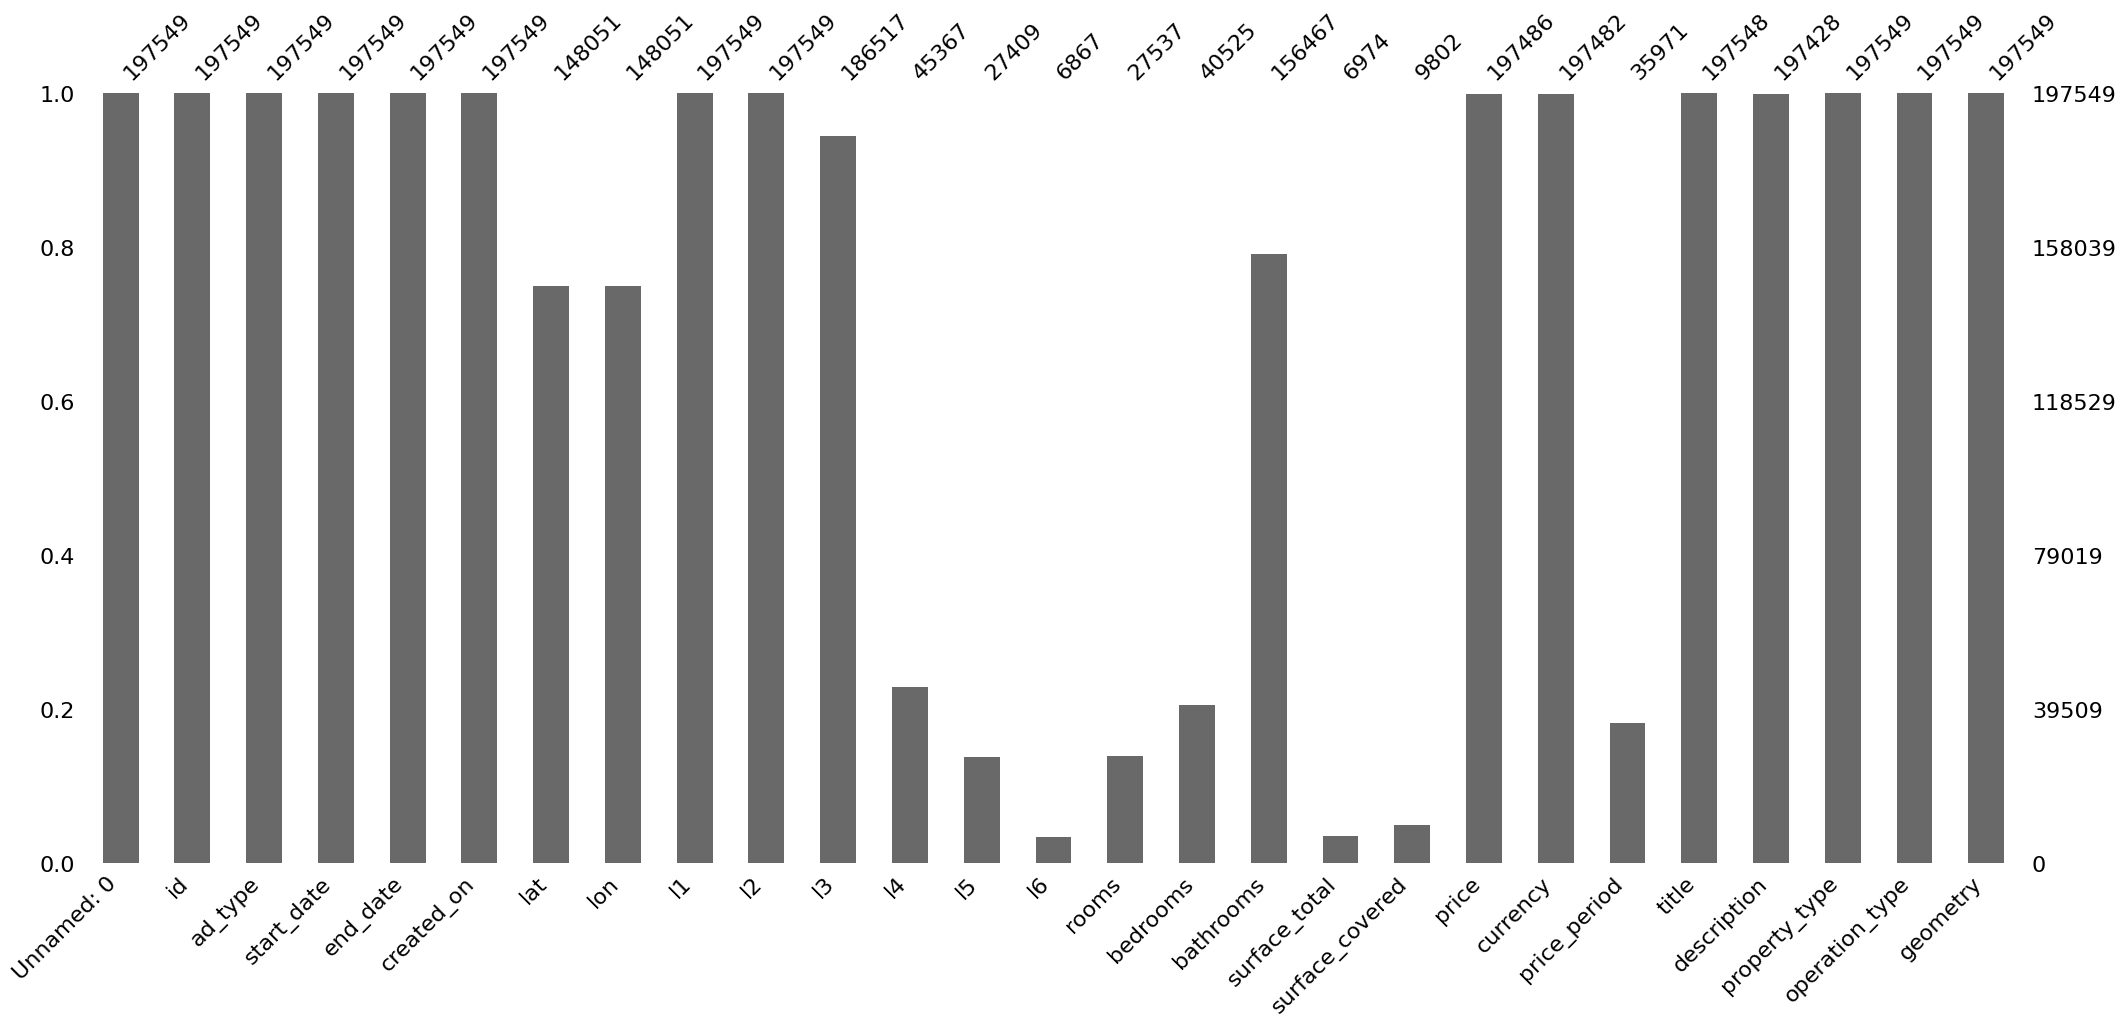

In [9]:
##GRAFICO  DE VALORES NULL  DE (TRAIN)

msno.bar(pt)
plt.show()

In [36]:
## DATOS UNICOS (TRAIN)
pt['price'].unique().tolist()

[9000000000.0,
 625000000.0,
 420000000.0,
 1310000000.0,
 210000000.0,
 167952300.0,
 2700000000.0,
 184000000.0,
 250000000.0,
 611000000.0,
 280000000.0,
 1430852000.0,
 200000000.0,
 3000000000.0,
 295000000.0,
 380000000.0,
 1200000000.0,
 1556000000.0,
 130000000.0,
 550000000.0,
 1380000000.0,
 650000000.0,
 1850000000.0,
 270000000.0,
 1100000000.0,
 120000000.0,
 235000000.0,
 181552300.0,
 150000000.0,
 345000000.0,
 176000000.0,
 2200000000.0,
 490000000.0,
 440000000.0,
 85000000.0,
 240000000.0,
 371702000.0,
 350000000.0,
 661000000.0,
 228030648.0,
 55000000.0,
 275000000.0,
 100000000.0,
 220000000.0,
 90000000.0,
 800000000.0,
 450000000.0,
 190000000.0,
 174600000.0,
 325650000.0,
 4300000000.0,
 1400000000.0,
 480000000.0,
 180000000.0,
 398000000.0,
 900000000.0,
 140000000.0,
 12000000000.0,
 974000000.0,
 1500000000.0,
 290000000.0,
 3200000000.0,
 1540000000.0,
 5400000000.0,
 595000000.0,
 278000000.0,
 1490000000.0,
 715000000.0,
 372277500.0,
 540000000.0,
 21

In [91]:
## DATOS MENORES "20000000" (TRAIN) Y VISTA DE 0 y PROPIEDADES EN DOLARES
pt[pt.price < 20000000]

Unnamed: 0                        id    ad_type  start_date  \
5440        592212  TwbAl1vTvuk3hSIqxr2dHA==  Propiedad  2020-12-18   
5902        968218  rbp33S2gwQMUm4uL9uiESg==  Propiedad  2020-08-25   
13237       794886  U0NPx8dIvU4vHOdu/12tig==  Propiedad  2020-12-16   
16240       974633  FMJl80FFGLD4s3De4SzGkg==  Propiedad  2020-11-27   
17901       227352  ueHj5twtfSikZPJ9/TVHrw==  Propiedad  2020-12-10   
...            ...                       ...        ...         ...   
182466      657939  BFUf8DC0BgU5oLUDTDyK6w==  Propiedad  2020-12-12   
183250      815111  Amzmvh3uA9Cj0NUZBKtwsg==  Propiedad  2020-09-18   
183669      587620  uWLZc6dXFQH55sC51LI3ZA==  Propiedad  2020-12-11   
186191      587621  01v03nGgcLJbQCTWWfw2sQ==  Propiedad  2020-12-11   
196673      563022  P2Su1iACp6TZoLRwltnWbA==  Propiedad  2020-10-13   

          end_date  created_on  lat    lon        l1               l2  ...  \
5440    2021-02-20  2020-12-18 4.67 -74.08  Colombia     Cundinamarca  ...   
5902    9999-12-31  2020-08-25 4.91 -73.99  Colombia     Cundinamarca  ...   
13237   2020-12-17  2020-12-16 4.64 -74.12  Colombia     Cundinamarca  ...   
16240   2020-11-27  2020-11-27  NaN    NaN  Colombia  Valle del Cauca  ...   
17901   2021-01-06  2020-12-10  NaN    NaN  Colombia             Meta  ...   
...            ...         ...  ...    ...       ...              ...  ...   
182466  2021-07-06  2020-12-12 7.10 -73.10  Colombia        Santander  ...   
183250  2020-12-23  2020-09-18 4.69 -74.12  Colombia     Cundinamarca  ...   
183669  2020-12-18  2020-12-11 4.64 -74.12  Colombia     Cundinamarca  ...   
186191  2020-12-15  2020-12-11 4.64 -74.12  Colombia     Cundinamarca  ...   
196673  2021-05-10  2020-10-13 4.68 -74.06  Colombia     Cundinamarca  ...   

       surface_total surface_covered         price currency  price_period  \
5440             NaN             NaN 15,000,000.00      COP           NaN   
5902             NaN             NaN    750,000.00      USD           NaN   
13237            NaN             NaN 19,480,500.00      COP       Mensual   
16240            NaN             NaN          0.00      NaN       Mensual   
17901            NaN             NaN 14,000,000.00      COP           NaN   
...              ...             ...           ...      ...           ...   
182466           NaN             NaN 15,000,000.00      COP           NaN   
183250           NaN             NaN 18,500,000.00      COP           NaN   
183669           NaN             NaN 19,480,500.00      COP       Mensual   
186191           NaN             NaN 19,480,500.00      COP           NaN   
196673           NaN             NaN  3,000,000.00      COP           NaN   

                                                    title  \
5440                                    lavadero de motos   
5902       Vendo espectacular casa entre Bogota y Briceño   
13237                                   bodega montevideo   
16240         Venta casa  barrio cuidad Córdoba cali vall   
17901                            venta lote villavicencio   
...                                                   ...   
182466    Lotes con escrituras y con inicial $15 millones   
183250  BODEGA EN ARRIENDO EN ALAMOS  BOGOTA SimiCRM58...   
183669                                  bodega montevideo   
186191                                  bodega montevideo   
196673  CASA EN ARRIENDO/VENTA, BOGOTA-URBANIZACION SA...   

                                              description  property_type  \
5440    <b>lavadero de motos</b><br><br>Excelente opor...           Otro   
5902    Espectacular casa entre Bogota- Briceño km 12 ...           Casa   
13237   Excelente bodega en Montevideo, cerca a vías p...           Otro   
16240   <b>Venta casa  barrio cuidad Córdoba cali vall...           Casa   
17901   <b>venta lote villavicencio</b><br><br>venta d...           Lote   
...                                                   ...            ...   
182466  CONJUNTO BARILOCHE E

In [94]:
## Propiedades en dolares (TRAIN)

usd = pt.loc[pt['currency'] == 'USD']
print(usd)

        Unnamed: 0                        id    ad_type  start_date  \
5902        968218  rbp33S2gwQMUm4uL9uiESg==  Propiedad  2020-08-25   
49196          110  qw+l3GewCFgQ4KH0pxStUA==  Propiedad  2020-10-07   
56159       874575  4p1clkPJ5acEDb9cY38Umg==  Propiedad  2020-10-26   
56522       874396  yu6EN/r21XB3FDkuEVqL+A==  Propiedad  2020-10-26   
116979       51666  EwDsJaQoCbpejoXGZReUjw==  Propiedad  2020-09-13   
136236      200614  scSKyD9kllWlPnoFwbwOKw==  Propiedad  2020-09-16   
137025      630538  U1bChe1aBazSg0SKUDfWXA==  Propiedad  2020-08-29   
167143      102295  w7sVBDzBykDl7sgZmAQoXw==  Propiedad  2020-08-08   

          end_date  created_on   lat    lon        l1  \
5902    9999-12-31  2020-08-25  4.91 -73.99  Colombia   
49196   2021-01-22  2020-10-07 10.51 -75.50  Colombia   
56159   2020-10-26  2020-10-26  4.74 -74.10  Colombia   
56522   2020-10-26  2020-10-26  4.70 -74.04  Colombia   
116979  2021-01-12  2020-09-13   NaN    NaN  Colombia   
136236  2020-10-29

In [96]:
## ZERO EN PRICE (TRAIN)
zero = pt.loc[pt['price'] == 0]
print(zero)

        Unnamed: 0                        id    ad_type  start_date  \
16240       974633  FMJl80FFGLD4s3De4SzGkg==  Propiedad  2020-11-27   
53528       651822  lRFFPLBKhuqAwk7ns/YfnA==  Propiedad  2020-12-15   
90818       259020  7qd0VoC+zFD4lW65hVpeYw==  Propiedad  2020-10-21   
119682      258984  kLou1k2ppcgn6KzYT8SgMw==  Propiedad  2020-10-21   

          end_date  created_on  lat  lon        l1               l2  ...  \
16240   2020-11-27  2020-11-27  NaN  NaN  Colombia  Valle del Cauca  ...   
53528   2020-12-15  2020-12-15  NaN  NaN  Colombia           Tolima  ...   
90818   2020-10-21  2020-10-21  NaN  NaN  Colombia        Antioquia  ...   
119682  2020-10-21  2020-10-21  NaN  NaN  Colombia        Santander  ...   

       surface_total surface_covered price currency  price_period  \
16240            NaN             NaN  0.00      NaN       Mensual   
53528            NaN             NaN  0.00      NaN       Mensual   
90818            NaN             NaN  0.00      NaN     

In [70]:
# ELIMINACION , EDICION Y COMPLETANDO COLUMNAS (TRAIN)
pt.drop(columns= ['Unnamed: 0'], inplace = True)
pt.drop(columns= ['id'], inplace = True)
pt.drop(columns= ['l4'], inplace = True)
pt.drop(columns= ['l5'], inplace = True)
pt.drop(columns= ['l6'], inplace = True)
pt.drop(columns= ['price_period'], inplace = True)
pt.drop(columns= ['geometry'], inplace = True)
pt['end_date'] = pt['end_date'].replace('9999', '2020', regex=True)
pt['end_date']
pt.fillna({'l3': 'Sin Datos'}, inplace=True)


In [4]:
# SE GENERA VALOR CARO Y BARATO PARA CADA PROPIEDAD SEGUN PRICE DE TRAIN!

promedio = pt["price"].mean()
pt["target"] = (pt['price'] >= promedio).astype(int) 
pt.target.value_counts()

0    151191
1     46358
Name: target, dtype: int64

In [62]:
## ELIMINACION DE PRICE (TRAIN)

pt.drop(columns= ['price'], inplace = True)

In [15]:
##DESCRIPCION  DE CADA COLUMNA DE (TRAIN)
pt.describe()

lat        lon      rooms   bedrooms  bathrooms  surface_total  \
count 197,549.00 197,549.00 197,549.00 197,549.00 197,549.00     197,549.00   
mean        5.67     -75.04       3.04       3.05       2.51          49.04   
std         1.90       0.96       0.66       0.90       1.31       1,470.52   
min       -32.79    -119.70       1.00       0.00       1.00           1.35   
25%         4.68     -75.58       3.00       3.00       2.00           1.35   
50%         5.67     -75.04       3.00       3.00       2.00           1.35   
75%         6.17     -74.23       3.00       3.00       3.00           1.35   
max        34.42     -67.48      40.00      96.00      20.00     180,000.00   

       surface_covered              price     target  
count       197,549.00         197,486.00 197,549.00  
mean            948.02     643,605,091.01       0.23  
std           8,310.16   1,944,867,706.99       0.42  
min               1.00               0.00       0.00  
25%             948.00     200,000,000.00       0.00  
50%             948.00     330,000,000.00       0.00  
75%             948.00     600,000,000.00       0.00  
max       3,480,000.00 345,000,000,000.00       1.00

In [10]:
## COMPLETANDO NULL DE DISTINTAS COLUMNAS CON UNA MEDIA !! (TRAIN)
pt.fillna({'lat': 5.67}, inplace=True)
pt.fillna({'lon': -75.04}, inplace=True)
pt.fillna({'rooms': 3.00}, inplace=True)
pt.fillna({'bedrooms': 3.00}, inplace=True)
pt.fillna({'bathrooms': 2.00}, inplace=True)
pt.fillna({'surface_total': 1.352}, inplace=True)
pt.fillna({'surface_covered': 948}, inplace=True)

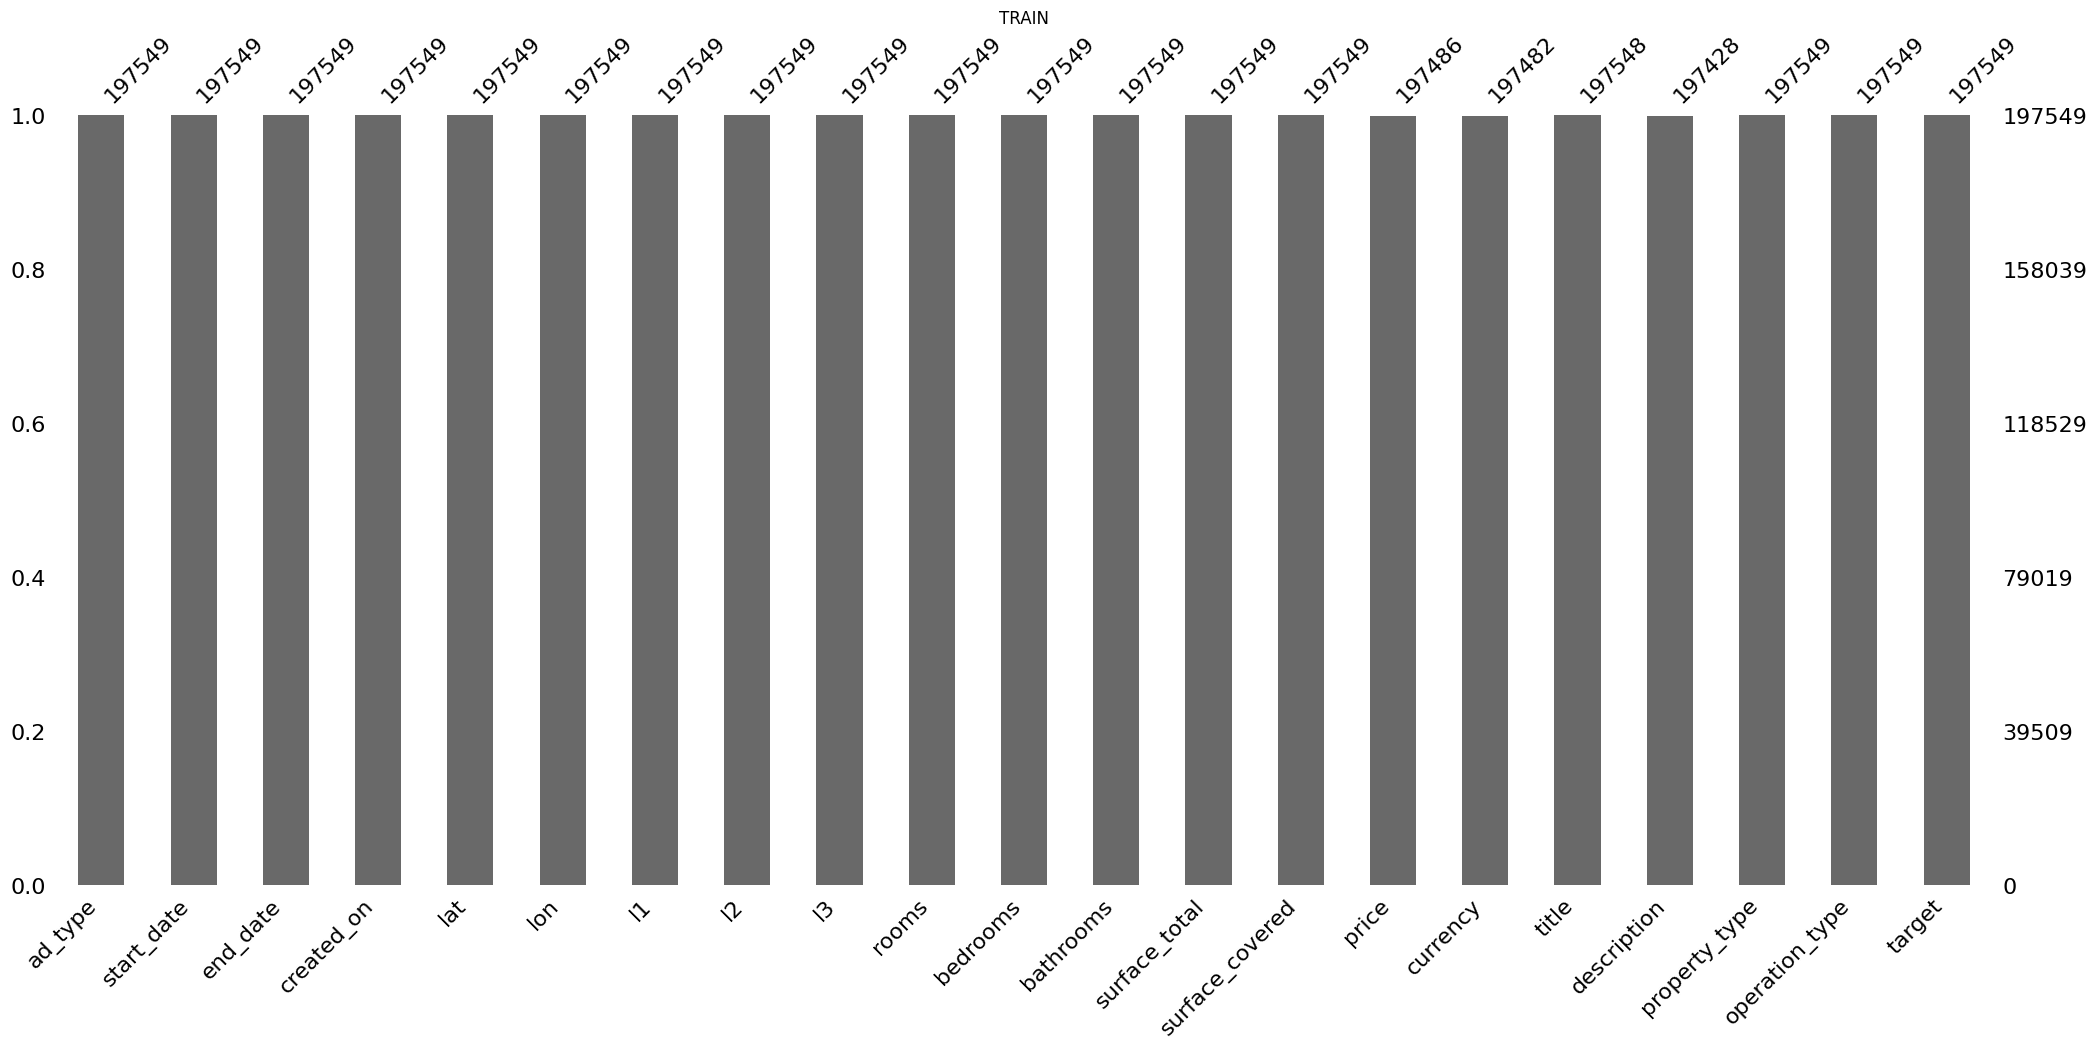

In [71]:
# TRATAMIENTO DE DATOS (TRAIN) . MEAN COLUMNAS
msno.bar(pt)
plt.title("TRAIN")
plt.show()

In [72]:
## VARIABLES X Y DE TRAIN
X = pt[['lat','lon','rooms','bedrooms','bathrooms','surface_total','surface_covered']] 
y = pt[['target']]



In [25]:
## VARIABLES X Y DE TEST

x = pte[['lat','lon','rooms','bedrooms','bathrooms','surface_total','surface_covered']] 

### Entrenamiento

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [74]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Kvecinos

In [75]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X.values, y.values)


C:\Users\workas\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
y_pred = clf.predict(X.values)

In [78]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [80]:
def natricas_precision(v1, v2):

    acurracy = accuracy_score(y,y_pred)
    recall = recall_score(y,y_pred)
    f1 = f1_score(y,y_pred)
    precision = precision_score(y,y_pred)
    return acurracy, recall, f1, precision


In [81]:
natricas_precision(y,y_pred)

(0.8972761188363393,
 0.7219681608352388,
 0.7673648129678671,
 0.8188535218848628)

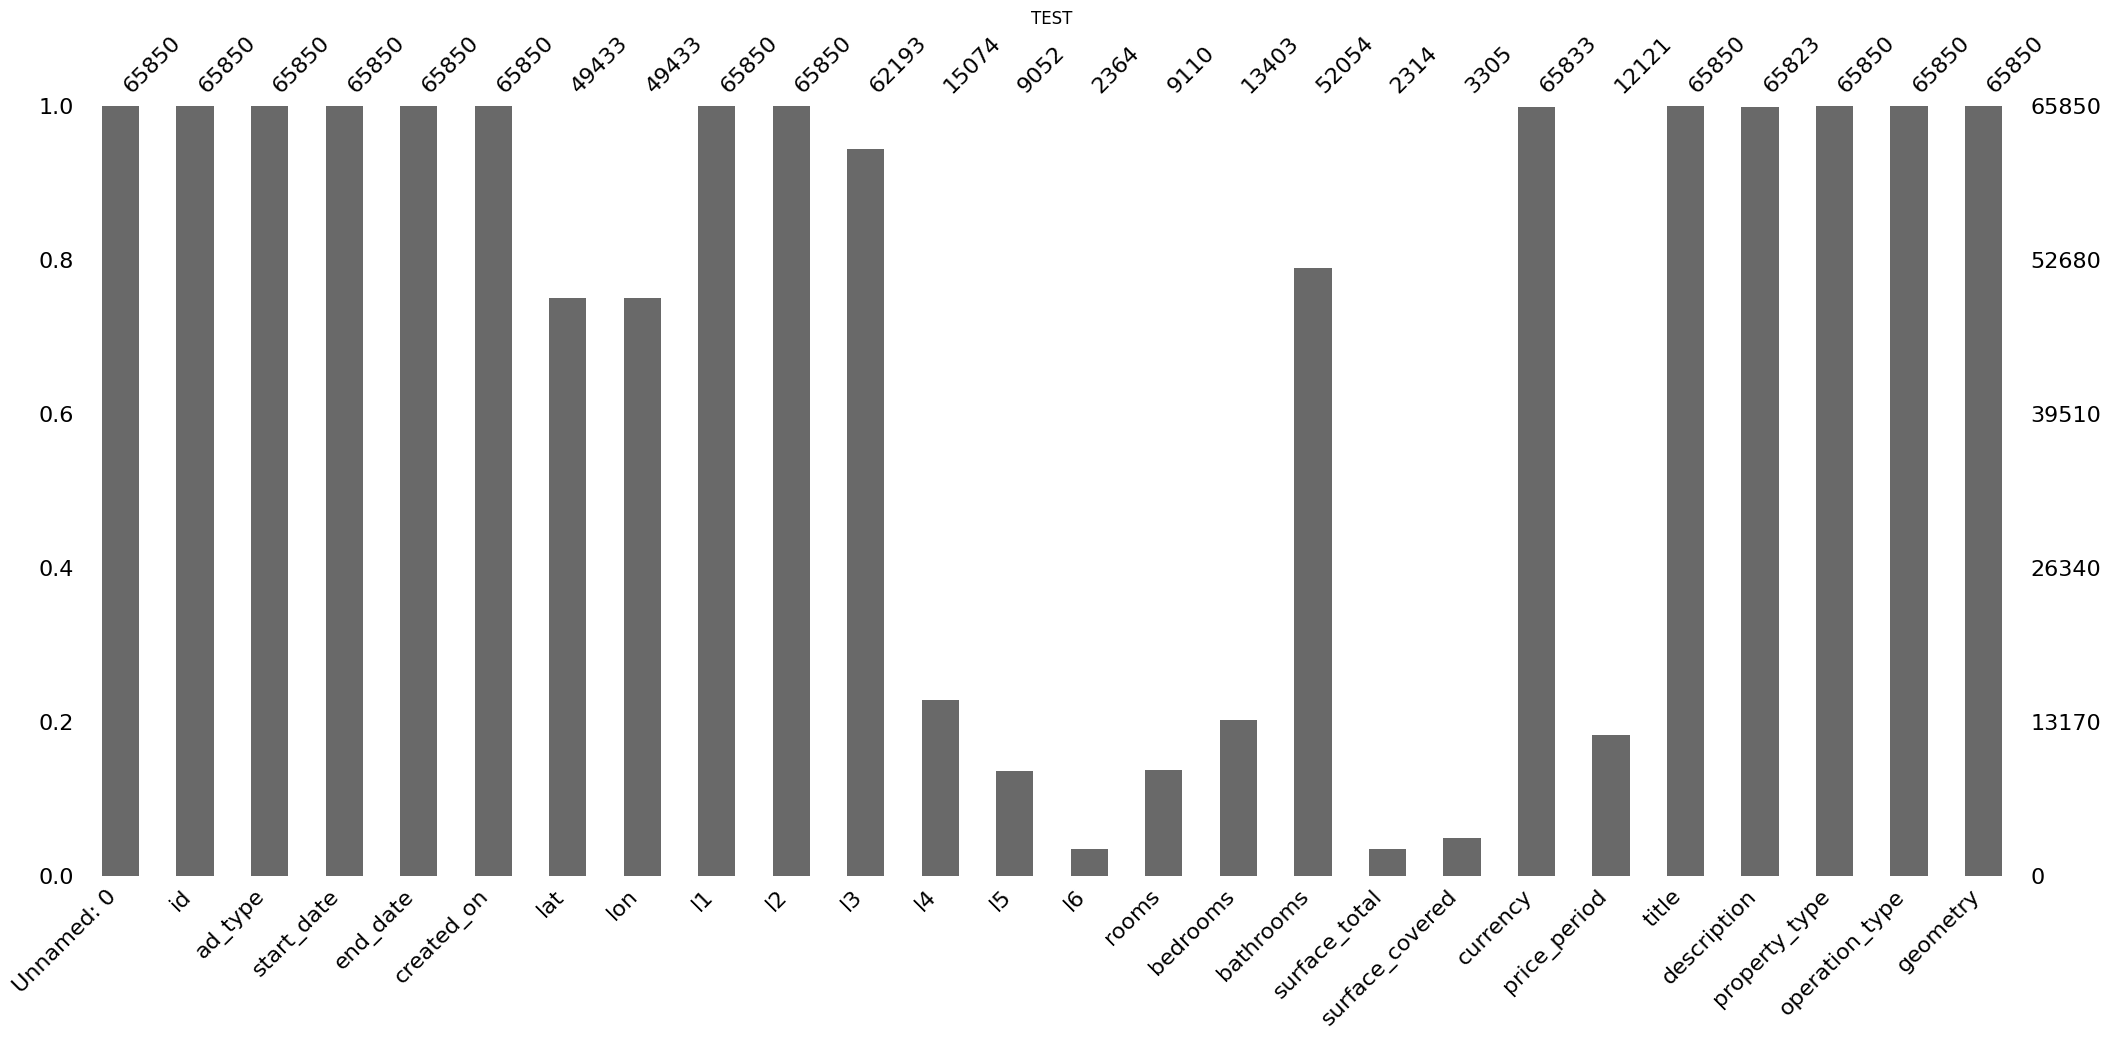

In [19]:
##GRAFICO  DE VALORES NULL  DE (TEST)

msno.bar(pte)
plt.title("TEST")
plt.show()

In [23]:
##DESCRIPCION  DE CADA COLUMNA DE (TEST)
pte.describe()

Unnamed: 0       lat       lon     rooms  bedrooms  bathrooms  \
count   65,850.00 65,850.00 65,850.00 65,850.00 65,850.00  65,850.00   
mean   500,260.29      5.68    -75.04      3.04      3.05       2.51   
std    290,438.14      1.92      0.95      0.64      0.89       1.29   
min          4.00     -4.20    -81.71      1.00      0.00       1.00   
25%    235,030.50      4.68    -75.58      3.00      3.00       2.00   
50%    509,299.50      5.67    -75.04      3.00      3.00       2.00   
75%    772,024.50      6.17    -74.23      3.00      3.00       3.00   
max    993,559.00     13.34    -67.92     40.00     60.00      20.00   

       surface_total  surface_covered  
count      65,850.00        65,850.00  
mean           48.93         1,182.30  
std         1,781.12        67,497.00  
min             1.35             1.00  
25%             1.35           948.00  
50%             1.35           948.00  
75%             1.35           948.00  
max       200,000.00    17,320,000.00

In [22]:
## COMPLETANDO NULL DE DISTINTAS COLUMNAS CON UNA MEDIA !! (TEST)
pte.fillna({'lat': 5.68}, inplace=True)
pte.fillna({'lon': -75.04}, inplace=True)
pte.fillna({'rooms': 2.00}, inplace=True)
pte.fillna({'bedrooms': 2.00}, inplace=True)
pte.fillna({'bathrooms': 1.00}, inplace=True)
pte.fillna({'surface_total': 1.355}, inplace=True)
pte.fillna({'surface_covered': 5.616}, inplace=True)

In [84]:
## Entrenamiento (TEST) Creacion CSV
pred = clf.predict(x.values)

In [85]:
## Vista (TEST) ARRAY
pred

array([1, 0, 0, ..., 0, 0, 0])

In [86]:
## Converido dataframe (TEST) y Creacion de Columna 0 a "Pred"
pred = pd.DataFrame(pred)
pred.rename({0 : "pred"}, axis = 1 ,inplace = True)

In [88]:
## Creacion .CSV pred 

pred.to_csv('Workitaws.csv',  
                  index = None)

In [90]:
## Vista del .CSV pred 
predic = pd.read_csv(r"Workitaws.csv" )
predic

pred
0         1
1         0
2         0
3         0
4         0
...     ...
65845     0
65846     0
65847     0
65848     0
65849     0

[65850 rows x 1 columns]

C:\Users\workas\AppData\Local\Temp\ipykernel_13748\273422250.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = pt.corr()


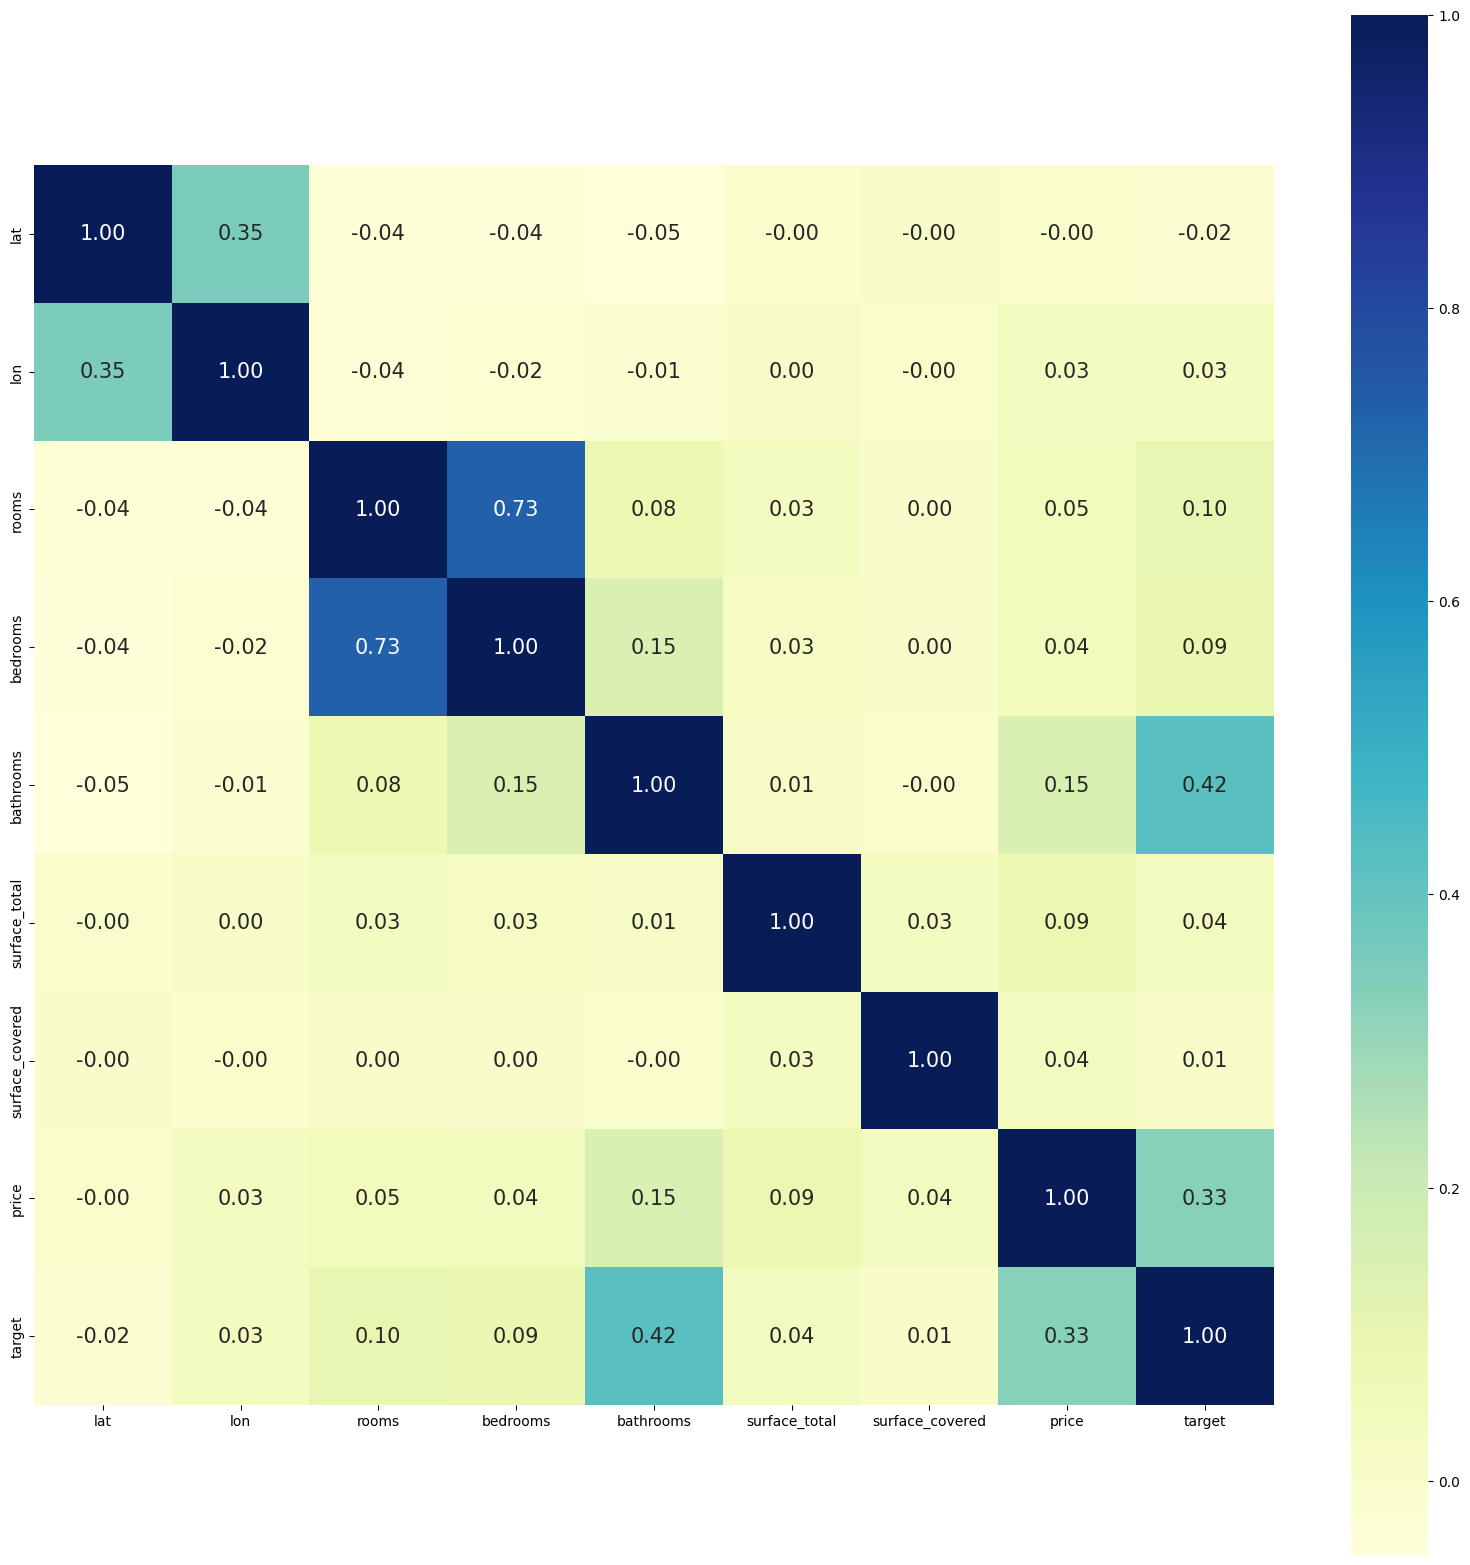

In [43]:
# Mapa de calor para ver la correlación entre las variables TRAIN

corr = pt.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= corr.columns, 
           yticklabels= corr.columns,
           cmap= 'YlGnBu')
plt.show()

C:\Users\workas\AppData\Local\Temp\ipykernel_7596\3096606633.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = pte.corr()


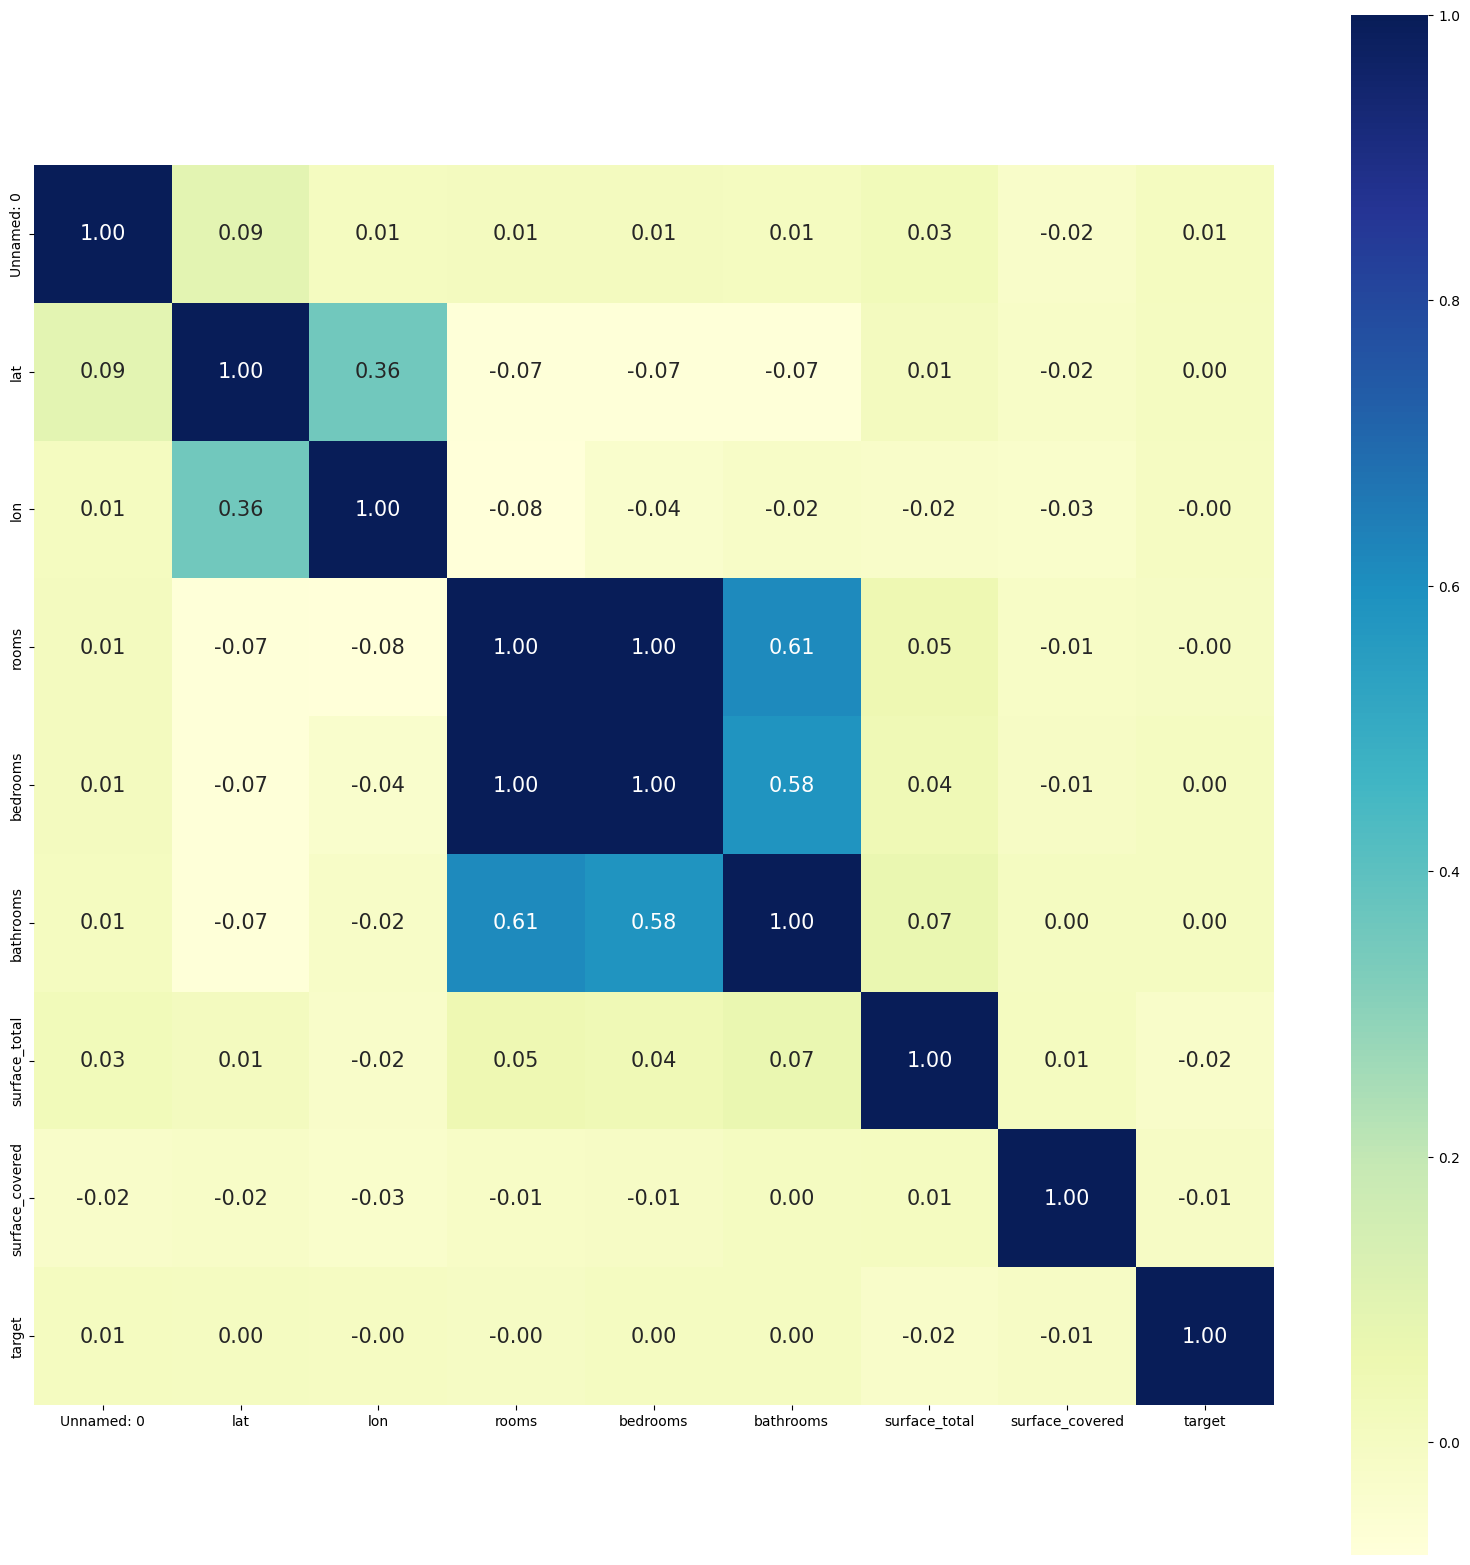

In [30]:
# Mapa de calor para ver la correlación entre las variables TEST
corr = pte.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= corr.columns, 
           yticklabels= corr.columns,
           cmap= 'YlGnBu')
plt.show()

In [48]:
##CANTIDAD DE NULL POR COLUMNA (TEST)
pte.count().sort_values()

surface_total       2314
l6                  2364
surface_covered     3305
l5                  9052
rooms               9110
price_period       12121
bedrooms           13403
l4                 15074
lat                49433
lon                49433
bathrooms          52054
l3                 62193
description        65823
currency           65833
property_type      65850
title              65850
Unnamed: 0         65850
l2                 65850
l1                 65850
created_on         65850
end_date           65850
start_date         65850
ad_type            65850
id                 65850
operation_type     65850
geometry           65850
dtype: int64

In [84]:
## TIPO DE FORMATO POR COLUMNA (TEST)

pte.dtypes

Unnamed: 0           int64
id                  object
ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
l4                  object
l5                  object
l6                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
currency            object
price_period        object
title               object
description         object
property_type       object
operation_type      object
geometry            object
dtype: object

In [91]:
##CANTIDAD DE NULL POR COLUMNA (TRAIN)
pt.count().sort_values()

description        197428
currency           197482
price              197486
title              197548
ad_type            197549
property_type      197549
surface_covered    197549
surface_total      197549
bathrooms          197549
operation_type     197549
bedrooms           197549
l3                 197549
l2                 197549
l1                 197549
lon                197549
lat                197549
created_on         197549
end_date           197549
start_date         197549
rooms              197549
target             197549
dtype: int64

In [92]:
## TIPO DE FORMATO POR COLUMNA (TRAIN)
pt.dtypes

ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
target               int32
dtype: object

In [29]:
import folium
from folium.plugins import HeatMap


In [30]:
## Creacion de MAPA
map= folium.Map(Location =[4.570868, -74.297333], tiles='openstreetmap', zoom_start=5)
map

In [40]:
## Creacion de Cordenadas

casas = pt[["lat", "lon"]].to_numpy()
casas

array([[  6.203     , -75.572     ],
       [  4.7227485 , -74.0731146 ],
       [  4.709     , -74.03      ],
       ...,
       [  3.413     , -76.541     ],
       [  4.67487431, -74.14707691],
       [ 10.9359937 , -74.8028991 ]])

In [41]:
## Carga de CORDENADAS Y LUGAR DE CO! CONCEPTUAL

HeatMap(casas, radius=15, max_val=0.1, min_apacity=0.4).add_to(map)
map

C:\Users\workas\AppData\Local\Temp\ipykernel_13748\1068308220.py:1: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(casas, radius=15, max_val=0.1, min_apacity=0.4).add_to(map)


In [49]:
X = pt[["rooms","surface_covered","surface_total","bedrooms","bathrooms"]]
y = pt["target"]

In [50]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [52]:
regressor.fit(X_train,y_train)

LinearRegression()